<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/06-25/litao3_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 537, done.
remote: Counting objects: 100% (340/340), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 537 (delta 170), reused 265 (delta 138), pack-reused 197
Receiving objects: 100% (537/537), 25.58 MiB | 9.91 MiB/s, done.
Resolving deltas: 100% (246/246), done.
Updating files: 100% (70/70), done.


'/content'

### 25-06-24 LiTaO3 gating

First part : measurement of the current source/drain

Seconde part : gate/drain

Then gating, electrode on, no gating voltage

Finally : gating
- Frequency : 0.1 Hz
- Amplitude : 1 Vpp
- Offset : 870 mV
- Duty Cycle : 75%


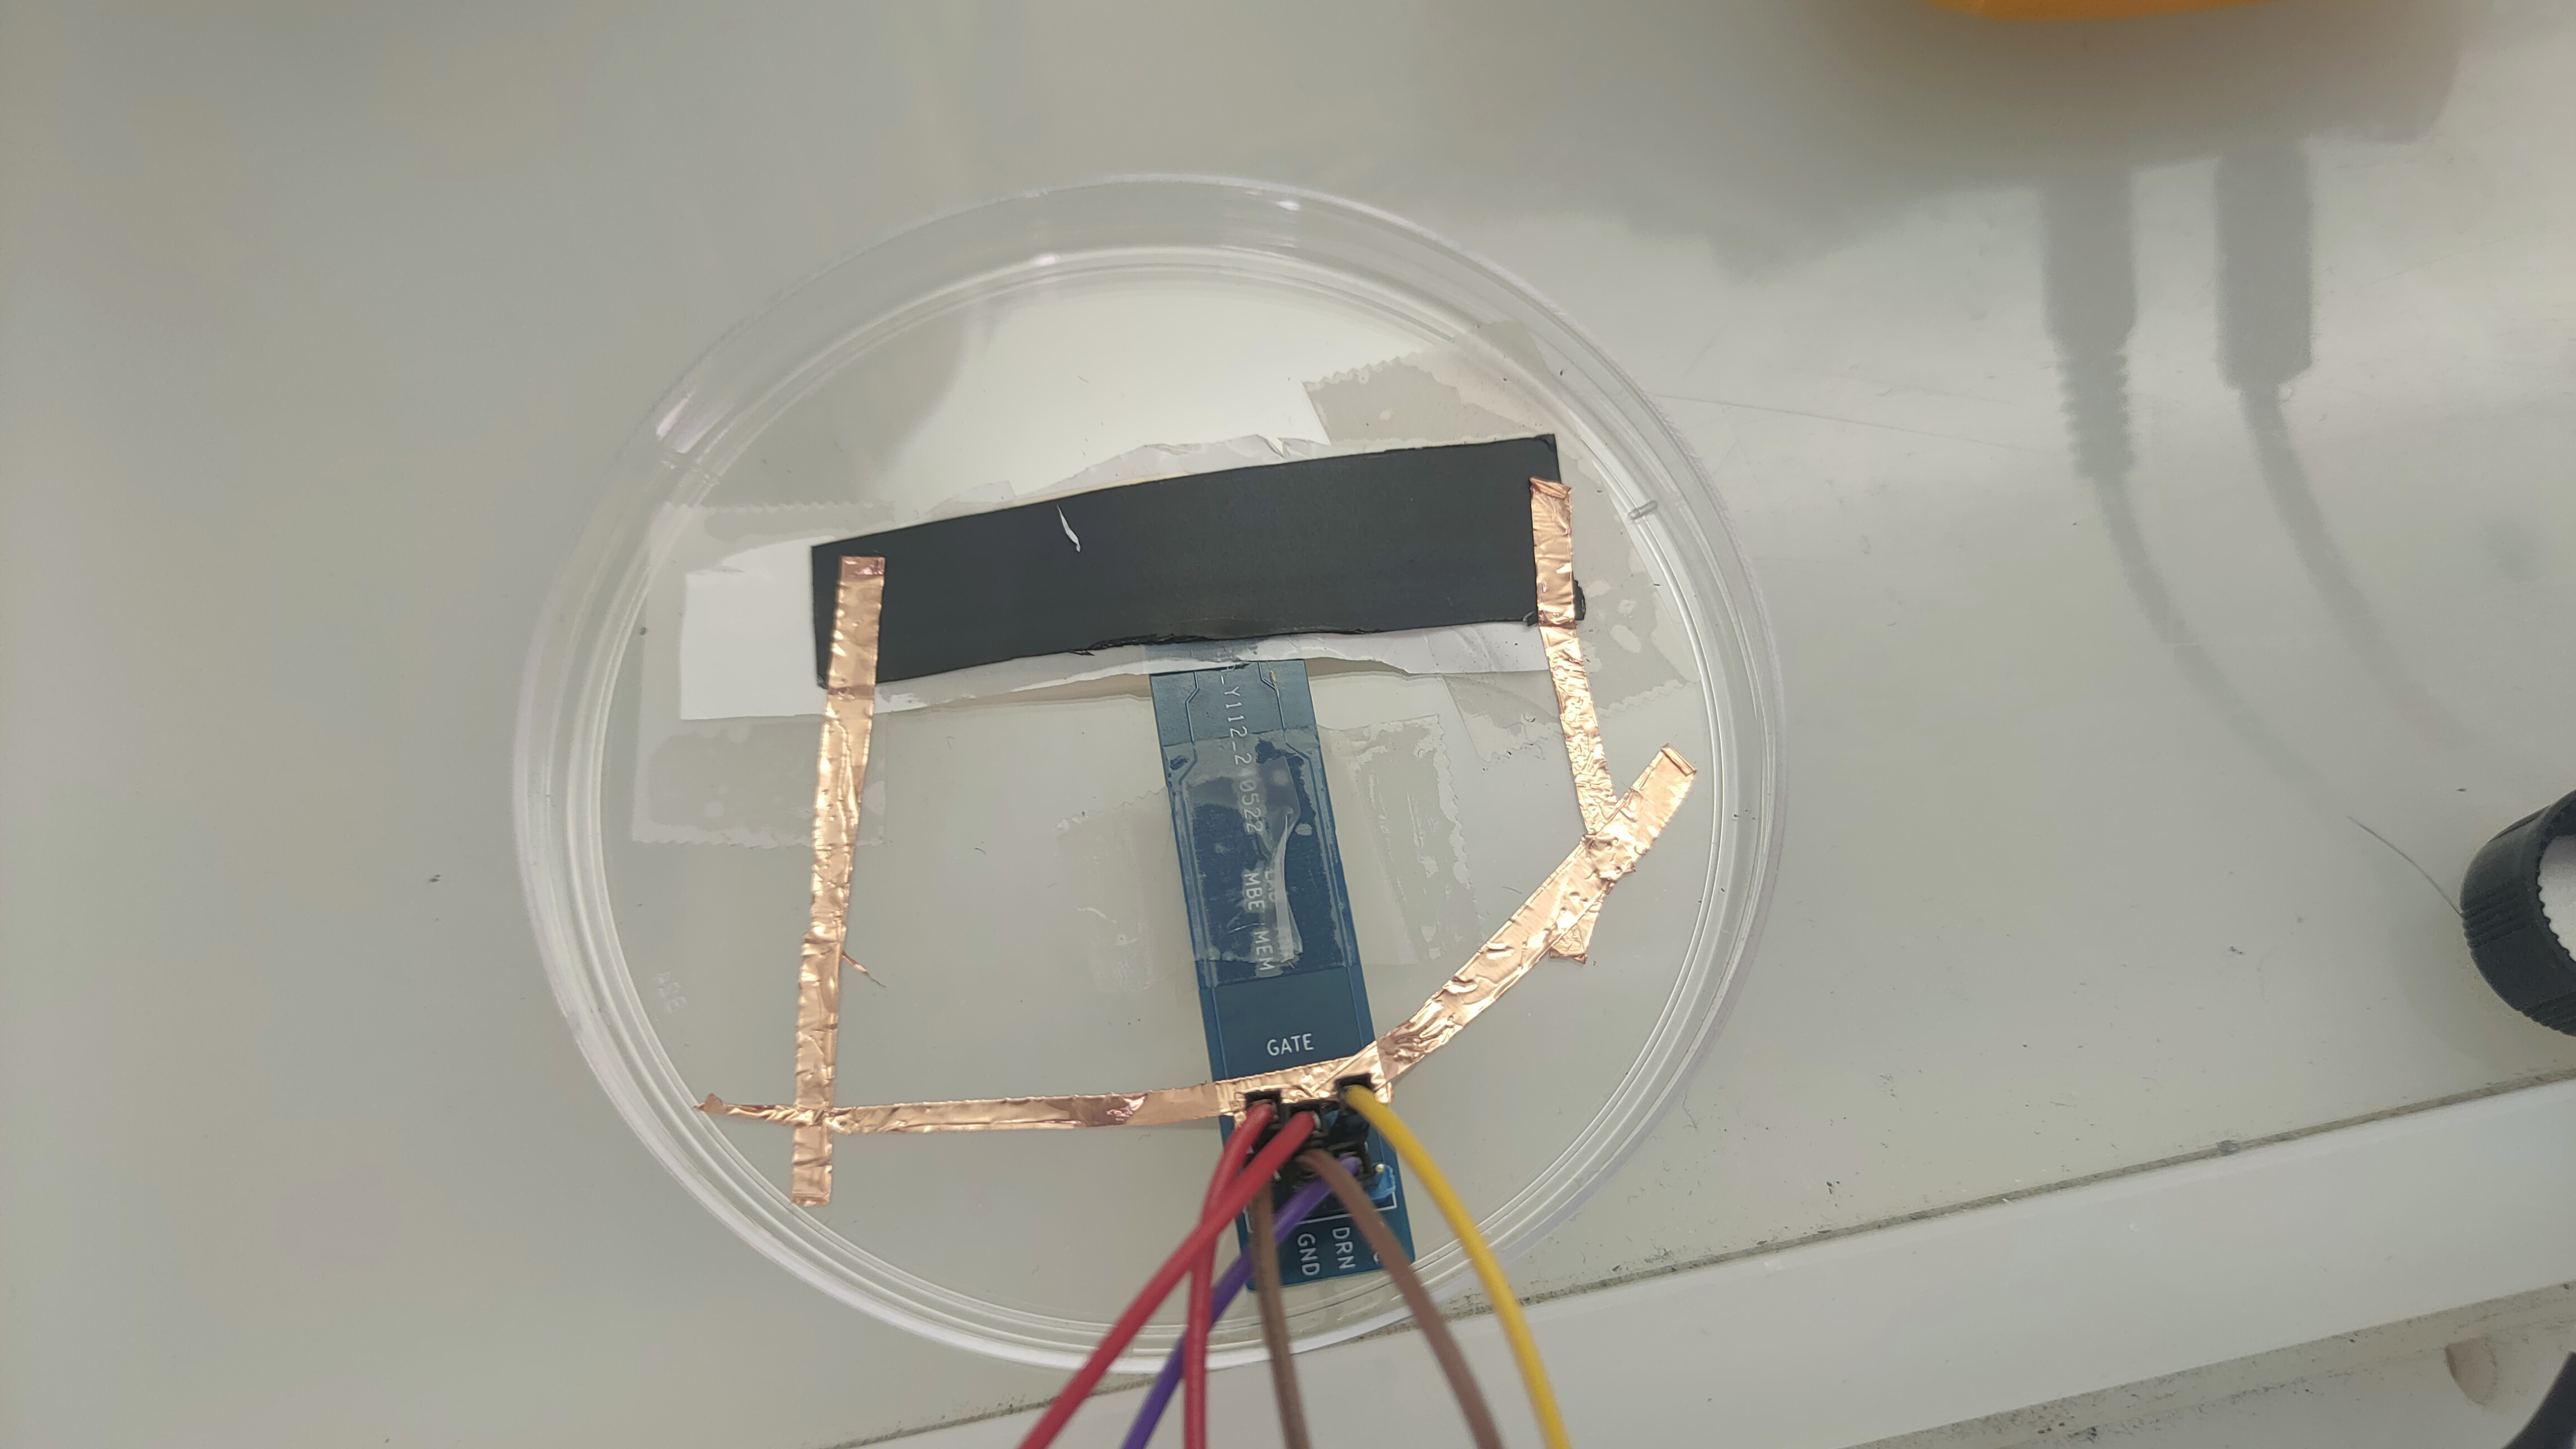




# Base Time
06/20/2024 12:42:09

In [4]:
%cd "/content/gator/data/06-25/"

/content/gator/data/06-25


In [5]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [6]:
prep_csv('defbuffer1_0625_094613.csv')
df = pd.read_csv('defbuffer1_0625_094613.csv')


Fill Mode,1



In [7]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-7.783942e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,99099995300309345000000000000000000000.0000000...,Volt DC,1.000000e+13,F,2W,F,F,0.000000
1,-1.237782e-08,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.0000026747075,Volt DC,1.000000e-02,F,2W,F,F,0.372232
2,-7.372764e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,99099995300309345000000000000000000000.0000000...,Volt DC,1.000000e+13,F,2W,F,F,1.217015
3,-1.164518e-08,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.0000025473710,Volt DC,1.000000e-02,F,2W,F,F,1.588838
4,-3.604838e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,99099995300309345000000000000000000000.0000000...,Volt DC,1.000000e+13,F,2W,F,F,2.314445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,3.792694e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.9616896510124,Volt DC,1.000000e+00,T,2W,F,F,265.232622
1376,3.771376e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.9618215560913,Volt DC,1.000000e+00,T,2W,F,F,265.301986
1377,3.753917e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.9620606303215,Volt DC,1.000000e+00,T,2W,F,F,265.371314
1378,3.755476e-09,Amp DC,1.000000e-08,5.5,F,F,F,F,F,F,...,F,Main,0.9622707366943,Volt DC,1.000000e+00,T,2W,F,F,265.440644


In [8]:
# Time (s)
T = df['Relative Time']

# Current (mA)
I = df['Reading']

# Potential (mV)
V = df['Value']

Text(0.5, 0, 'Time (s)')

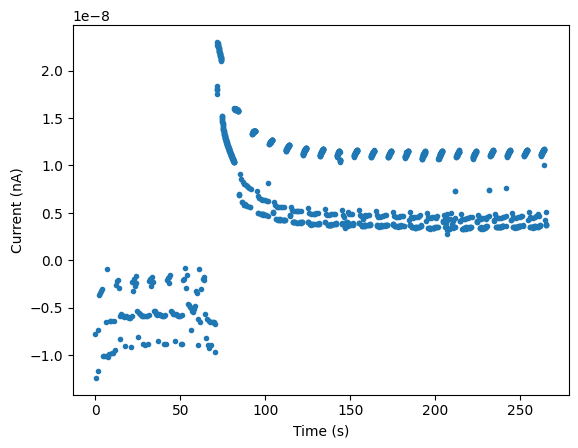

In [9]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

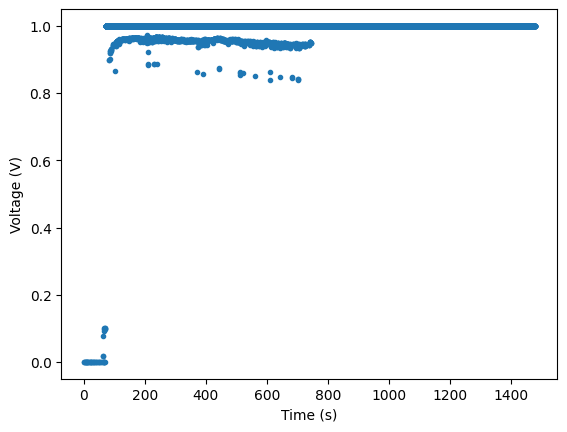

In [21]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

In [13]:
prep_csv('defbuffer1_0625_100625.csv')
df2 = pd.read_csv('defbuffer1_0625_100625.csv')

Fill Mode,1



In [14]:
df2

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-7.783942e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,99099995300309345000000000000000000000.0000000...,Volt DC,1.000000e+13,F,2W,F,F,0.000000
1,-1.237782e-08,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.0000026747075,Volt DC,1.000000e-02,F,2W,F,F,0.372232
2,-7.372764e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,99099995300309345000000000000000000000.0000000...,Volt DC,1.000000e+13,F,2W,F,F,1.217015
3,-1.164518e-08,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.0000025473710,Volt DC,1.000000e-02,F,2W,F,F,1.588838
4,-3.604838e-09,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,99099995300309345000000000000000000000.0000000...,Volt DC,1.000000e+13,F,2W,F,F,2.314445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,2.802695e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.9999758005142,Volt DC,1.000000e+00,T,2W,F,F,1477.580958
14779,2.803871e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.9999757409096,Volt DC,1.000000e+00,T,2W,F,F,1477.650308
14780,2.807798e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.9999727010727,Volt DC,1.000000e+00,T,2W,F,F,1477.719666
14781,2.811762e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.9999740719795,Volt DC,1.000000e+00,T,2W,F,F,1477.789006


In [16]:
# Time (s)
T = df2['Relative Time']

# Current (mA)
I = df2['Reading']

# Potential (V)
V = df2['Value']

Text(0.5, 0, 'Time (s)')

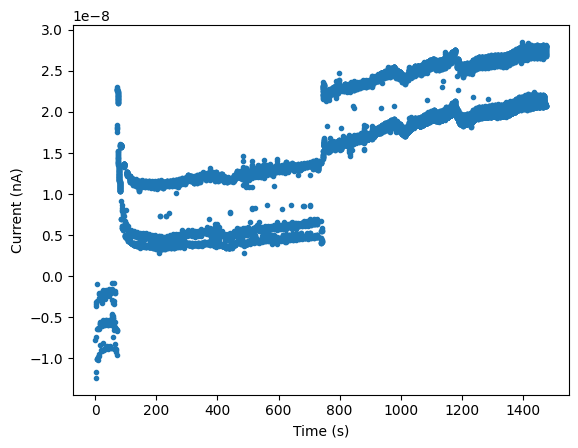

In [17]:

cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

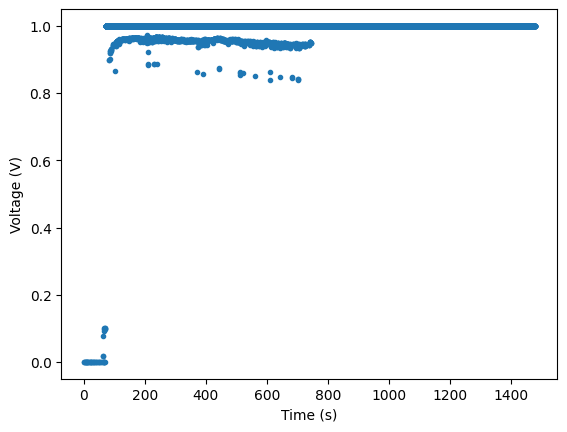

In [20]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

### Measuring the current between gate and drain

In [22]:
prep_csv('defbuffer1_0625_101051.csv')
df3 = pd.read_csv('defbuffer1_0625_101051.csv')

Fill Mode,1



In [23]:
df3

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,-1.886904e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.000291,Volt DC,1,F,2W,F,F,0.000000
1,5.975142e-10,Amp DC,1.000000e-06,5.5,F,F,F,F,F,F,...,F,Main,0.000012,Volt DC,1,F,2W,F,F,0.548905
2,4.967401e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.005586,Volt DC,1,F,2W,F,F,1.338817
3,5.010095e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.005157,Volt DC,1,F,2W,F,F,2.060586
4,-7.989378e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.002245,Volt DC,1,F,2W,F,F,2.782350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,-1.861517e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.000797,Volt DC,1,F,2W,F,F,214.845031
309,-1.609942e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.001128,Volt DC,1,F,2W,F,F,215.566782
310,-1.686708e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.001103,Volt DC,1,F,2W,F,F,216.288552
311,-1.804916e-10,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,-0.001067,Volt DC,1,F,2W,F,F,217.010310


In [24]:
# Time (s)
T = df3['Relative Time']

# Current (mA)
I = df3['Reading']

# Potential (mV)
V = df3['Value']

Text(0.5, 0, 'Time (s)')

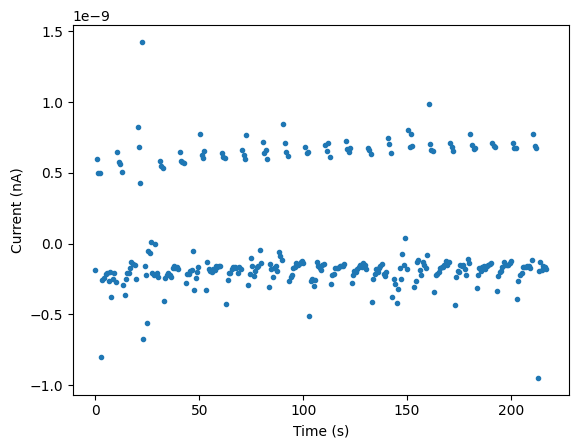

In [25]:


cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

Mystery : when the gating voltage is applied (75%), the current measured between gate and drain is negative  
This means the Li+ go out of our crystal when we're applying a positive gating voltage, which is not what's supposed to happen

Text(0.5, 0, 'Time (s)')

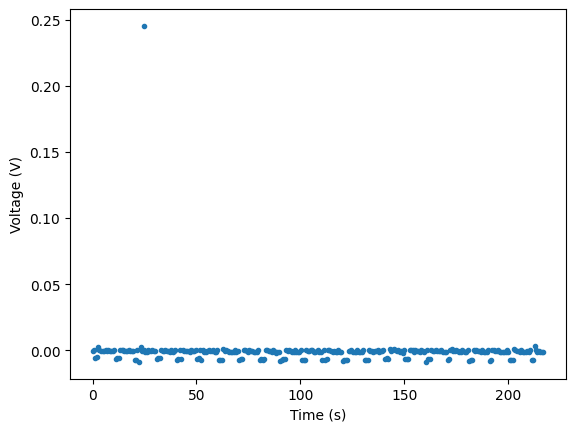

In [26]:
cut1 = 0
cut2 = -1
V_numeric = np.array(V, dtype=float)

mask = V_numeric < 1
T=T[mask]
V=V_numeric[mask]
plt.plot(T[cut1:cut2],V[cut1:cut2],'.')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')

In [27]:
prep_csv('defbuffer1_0625_130822.csv')
df4 = pd.read_csv('defbuffer1_0625_130822.csv')

Fill Mode,1



In [28]:
df4

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,3.414072e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999968,Volt DC,1,T,2W,F,F,6938.283304
1,3.424623e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999967,Volt DC,1,T,2W,F,F,6938.352650
2,3.433125e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999970,Volt DC,1,T,2W,F,F,6938.422002
3,3.444436e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999970,Volt DC,1,T,2W,F,F,6938.491332
4,3.457074e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999970,Volt DC,1,T,2W,F,F,6938.560672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.342292e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999967,Volt DC,1,T,2W,F,F,6937.936537
99996,3.357656e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999968,Volt DC,1,T,2W,F,F,6938.005888
99997,3.370239e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999971,Volt DC,1,T,2W,F,F,6938.075219
99998,3.385235e-08,Amp DC,1.000000e-07,5.5,F,F,F,F,F,F,...,F,Main,0.999970,Volt DC,1,T,2W,F,F,6938.144549


In [29]:
# Time (s)
T = df4['Relative Time']

# Current (mA)
I = df4['Reading']

# Potential (mV)
V = df4['Value']

Text(0.5, 0, 'Time (s)')

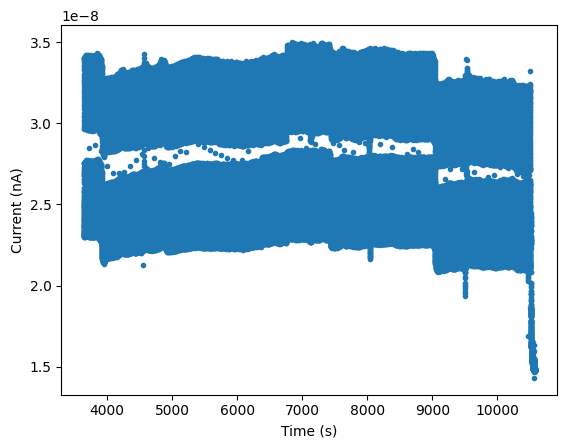

In [30]:
cut1 = 0
cut2 = -1
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

# EIS on gated sample

In [ ]:
!pip install impedance -q


In [ ]:
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit

In [ ]:
%ls


In [ ]:
freqs, Z = preprocessing.readZPlot('LiTao3_htol.z')
freqs, Z = np.delete(freqs, 32), np.delete(Z, 32) # remove 1 noise point (argmin(Z.imag))


plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
freqs, Z = preprocessing.readZPlot('LiTao3_ltoh.z')
freqs, Z = np.delete(freqs, 28), np.delete(Z, 28) # remove 1 noise point (argmin(Z.imag))


plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

plt.plot(freqs, -Z.imag, 'o')
plt.ylabel('Im(Z)')
plt.xlabel('freq')
plt.title('Bode')
plt.show()

In [ ]:
circuit = 'p(R0,CPE0)'
init = [1e6,1e-2,1]

circuit = CustomCircuit(circuit, initial_guess=init)


In [ ]:
circuit.fit(freqs, Z)

In [ ]:
Z_fit = circuit.predict(freqs)

plt.plot(Z_fit.real, -Z_fit.imag, 'o')
plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Nyquist')
plt.show()

In [ ]:
print(circuit)